In [22]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')
from stargazer.stargazer import Stargazer, LineLocation

from experimentation import data_preparation_splits, regression_OLS, full_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
df = data_preparation(file_location = "uk_data.csv", splits = 3, lags = 2, train_share = 0.9)

In [14]:
df

{'split_1': {'split_1_train':                  gdp  wage_growth  gdp_lag1  wage_growth_lag1  gdp_lag2  \
  date                                                                      
  2005-03-31 -0.372208     1.347709  0.000000         -2.110818  0.876095   
  2005-04-30  1.245330     0.797872 -0.372208          1.347709  0.000000   
  2005-05-31 -0.369004     0.263852  1.245330          0.797872 -0.372208   
  2005-06-30  0.617284     0.000000 -0.369004          0.263852  1.245330   
  2005-07-31  0.368098     0.789474  0.617284          0.000000 -0.369004   
  ...              ...          ...       ...               ...       ...   
  2010-02-28  1.465201     1.594533 -0.606796         -0.227273  0.610501   
  2010-03-31  0.842359    -1.121076  1.465201          1.594533 -0.606796   
  2010-04-30 -0.238663     0.000000  0.842359         -1.121076  1.465201   
  2010-05-31  0.478469     0.453515 -0.238663          0.000000  0.842359   
  2010-06-30  0.000000    -0.225734  0.478469   

In [24]:
df = regression_OLS(file_location = "uk_data.csv", splits = 3, lags = 2, train_share = 0.9, p_cutoff = 0.05)

ValueError: The indices for endog and exog are not aligned

In [23]:
full_df = full_df(file_location = "uk_data.csv", lags = 5)

In [4]:
full_df.tail()

,const,gdp,wage_growth,gdp_lag1,wage_growth_lag1,gdp_lag2,wage_growth_lag2,gdp_lag3,wage_growth_lag3,gdp_lag4,wage_growth_lag4,gdp_lag5,wage_growth_lag5
date,,,,,,,,,,,,,
2023-01-31,1.0,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153,-0.587659,0.323102,0.098039,0.814332
2023-02-28,1.0,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153,-0.587659,0.323102
2023-03-31,1.0,-0.292398,0.625000,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153
2023-04-30,1.0,1.000000,0.662500,-0.292398,0.625000,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233
2023-05-31,1.0,NaN,1.662500,1.000000,0.662500,-0.292398,0.625000,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948


In [117]:
df[2]

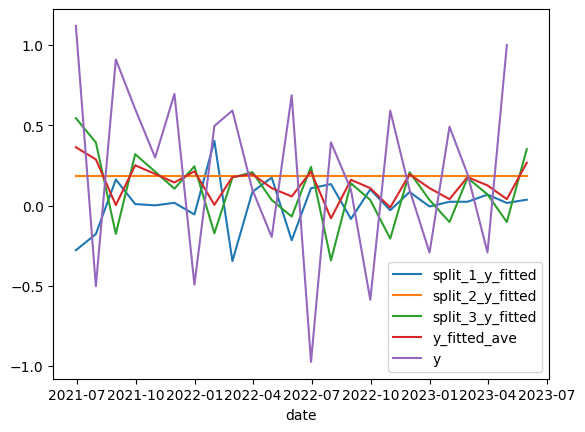

In [7]:
df[3].tail(24).plot();

In [8]:
print(df[0])
print(df[1])
df[2]
print(df[3])


+------------------------------------------------------+
| *** OUT OF SAMPLE PERFORMANCE ACROSS SUB-PERIODS *** |
+------------+------------+------------+---------------+
|            |   Sample 1 |   Sample 2 |      Sample 3 |
+------------+------------+------------+---------------+
| R2         |     0.0671 |    -0.0859 |       -0.8153 |
| Mae        |     0.3373 |     0.2831 |        0.4736 |
| Mse        |     0.1617 |     0.1111 |        0.3507 |
| Rmse       |     0.4021 |     0.3333 |        0.5922 |
| Start Date | 31/07/2010 | 30/09/2016 |    31/10/2022 |
| End Date   | 28/02/2011 | 30/04/2017 |    30/04/2023 |
+------------+------------+------------+---------------+
            const  split_1_y_fitted  split_2_y_fitted  split_3_y_fitted
date                                                                   
2005-07-31    1.0         -0.024394               NaN               NaN
2005-08-31    1.0          0.112065               NaN               NaN
2005-09-30    1.0          0

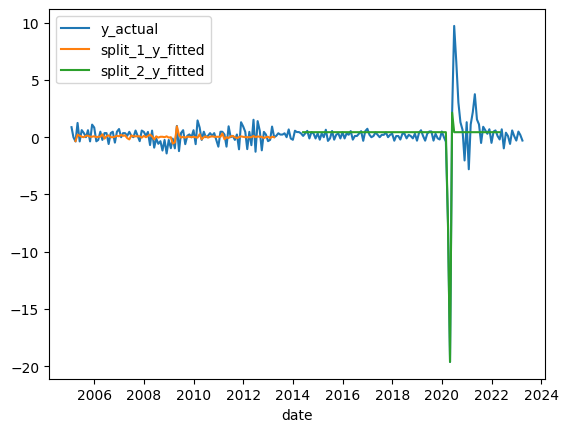

In [10]:

df[3].plot();
